# Imports + Load Dataset

In [71]:

import pandas as pd
import os
import matplotlib.pyplot as plt


In [72]:
CSV_PATH = "../datasets/processed/final_dataset_sentiment_analysis.csv"
df = pd.read_csv(CSV_PATH)
print(df.shape)
df.head()

(59630, 27)


C:\Users\yogan\AppData\Local\Temp\ipykernel_15064\2825538513.py:2: DtypeWarning: Columns (0: dateAdded, 1: dateUpdated, 2: imageURLs, 3: manufacturerNumber, 4: primaryCategories, 5: sourceURLs) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH)


,asins,brand,categories,dateAdded,dateUpdated,id,imageURLs,keys,manufacturer,manufacturerNumber,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs
0,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,NaN,AVqkIhwDv8e3D1O-lebb,NaN,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,NaN,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,NaN
1,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,NaN,AVqkIhwDv8e3D1O-lebb,NaN,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,NaN,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,NaN
2,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,NaN,AVqkIhwDv8e3D1O-lebb,NaN,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,NaN,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN
3,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,NaN,AVqkIhwDv8e3D1O-lebb,NaN,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,NaN,...,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,NaN
4,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",NaN,NaN,AVqkIhwDv8e3D1O-lebb,NaN,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,NaN,...,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN


In [73]:
df.columns

Index(['asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'id',
       'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'primaryCategories', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs'],
      dtype='str')

In [74]:
# Select Columns for easier reference
TEXT_COL = "reviews.text"
TITLE_COL = "reviews.title"
RATING_COL = "reviews.rating"


In [75]:
# Clean Text
df["text_all"] = df[TITLE_COL].fillna("") + ". " + df[TEXT_COL].fillna("")
df["text_all"] = df["text_all"].str.lower()

df = df[df["text_all"].str.len() > 5].copy()
print(df.shape)
df["text_all"].head(20)


(59629, 28)


0     kindle. this product so far has not disappoint...
1     very fast. great for beginner or experienced p...
2     beginner tablet for our 9 year old son.. inexp...
3     good!!!. i've had my fire hd 8 two weeks now a...
4     fantastic tablet for kids. i bought this for m...
5     just what we expected. this amazon fire 8 inch...
6     great e-reader tablet. great for e-reading on ...
7     great for gifts. i gave this as a christmas gi...
8     great for reading. great as a device to read b...
9     great and lightweight reader. i love ordering ...
10    nice tablet for the price. not easy for elderl...
11    excellent product. excellent product. easy to ...
12    great value. wanted my father to have his firs...
13    excellect. simply does everything i need. than...
14    living it. got it as a present and love the si...
15    favorite of any tablet. the kindle is easiest ...
16    good. nice reader. almost perfect for what i w...
17    nice tablet for the price. i really like t

In [76]:
# count words in each row
df["word_count"] = df["text_all"].astype(str).apply(lambda x: len(x.split()))

# basic stats
print("Lowest word count:", df["word_count"].min())
print("Highest word count:", df["word_count"].max())

# distribution summary
print(df["word_count"].describe())


Lowest word count: 2
Highest word count: 1868
count    59629.000000
mean        32.335390
std         36.153333
min          2.000000
25%         15.000000
50%         23.000000
75%         38.000000
max       1868.000000
Name: word_count, dtype: float64


In [77]:
df["word_count"].value_counts().sort_index()


word_count
2        35
3       263
4       745
5       485
6       718
       ... 
755       1
824       2
893       1
1546      4
1868      1
Name: count, Length: 354, dtype: int64

In [78]:
longest_row = df.loc[df["word_count"].idxmax(), "text_all"]
shortest_row = df.loc[df["word_count"].idxmin(), "text_all"]

print("Longest review:\n", longest_row)
print("\nShortest review:\n", shortest_row)


Longest review:
 superb reading device - but which one's best for you. this is a review of the kindle paperwhite launched july 2015. essentially. the same as the previous kindle paperwhite but with a fantastic upgraded (300 dpi) screen, more memory and storage it's a terrific reading device. this review aims to describe both this product, and compare it with the other kindle devices available to help you choose the best one for you.before i start, ive noticed several complains about kindle not supporting the epub format used by canadian public libraries. dont be put off, theres a solution in the frequently asked questions section below.this review is broken up into sections so you can skip the less interesting bits. if youre in a hurry ive included a summary at the start, and a frequently asked questions section at the end.summary - what can you do with it-----------------------------------------* read a book. it can store 1,000s of books - take an entire library away with you on holid

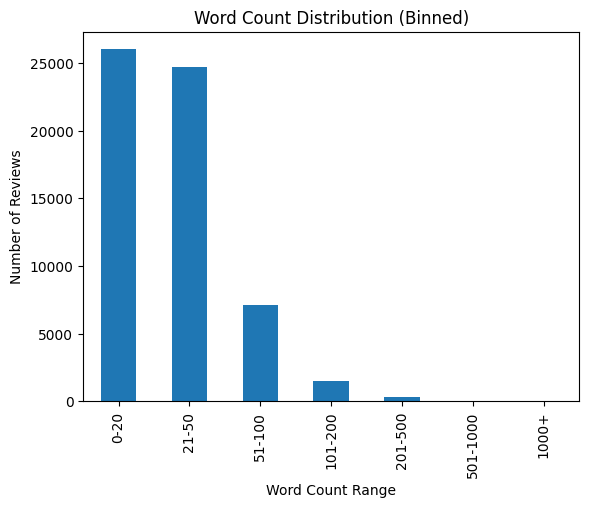

In [79]:
bins = [0, 20, 50, 100, 200, 500, 1000, df["word_count"].max()]
labels = ["0-20", "21-50", "51-100", "101-200", "201-500", "501-1000", "1000+"]

df["word_bin"] = pd.cut(df["word_count"], bins=bins, labels=labels, include_lowest=True)

bin_counts = df["word_bin"].value_counts().sort_index()

bin_counts.plot(kind="bar", title="Word Count Distribution (Binned)")
plt.xlabel("Word Count Range")
plt.ylabel("Number of Reviews")
plt.show()



# Create Weak Labels (VADER + keyword rules)

In [80]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# simple keyword rules
negative_words = ["broken", "refund", "waste", "bad", "terrible", "awful", "disappointed"]
positive_words = ["excellent", "amazing", "perfect", "great", "love", "awesome", "recommend"]

def weak_label(text):
    score = sia.polarity_scores(text)["compound"]

    # boost with keywords
    if any(word in text for word in positive_words):
        score += 0.2
    if any(word in text for word in negative_words):
        score -= 0.2

    # assign label
    if score >= 0.2:
        return "positive"
    elif score <= -0.2:
        return "negative"
    else:
        return "neutral"

df["weak_label"] = df["text_all"].apply(weak_label)

df["weak_label"].value_counts()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yogan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


weak_label
positive    53888
neutral      3241
negative     2500
Name: count, dtype: int64

In [81]:
print(df.shape)

(59629, 31)


In [82]:
df.columns

Index(['asins', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'id',
       'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'primaryCategories', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'text_all', 'word_count', 'word_bin', 'weak_label'],
      dtype='str')

In [83]:
df['weak_label'].tail(20)

59610    positive
59611    positive
59612    positive
59613    positive
59614    positive
59615    positive
59616    positive
59617    positive
59618    positive
59619    positive
59620    positive
59621    positive
59622    negative
59623    positive
59624    positive
59625    positive
59626    positive
59627    positive
59628    positive
59629    positive
Name: weak_label, dtype: str

# Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

X = df["text_all"]
y = df["weak_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 47703
Test size: 11926


# Train Model (TF-IDF + LinearSVC)
1 and 2 ngrams

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

model = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)),
    ("clf", LinearSVC(class_weight="balanced"))
])

model.fit(X_train, y_train)



,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('tfidf', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [86]:
import joblib
import os

os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/sentiment_model.pkl")
print("Model saved successfully in ../models/sentiment_model.pkl")



Model saved successfully in ../models/sentiment_model.pkl


In [87]:
# Load model later

# import joblib
# loaded_model = joblib.load("sentiment_model.pkl")
# print("Model loaded successfully!")

In [88]:
## predict with loaded model
# sample_text = ["This product is amazing and works perfectly!"]
# prediction = loaded_model.predict(sample_text)
# print("Prediction:", prediction[0])

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=["negative","neutral","positive"]))


              precision    recall  f1-score   support

    negative       0.77      0.70      0.73       500
     neutral       0.74      0.66      0.70       648
    positive       0.98      0.99      0.98     10778

    accuracy                           0.96     11926
   macro avg       0.83      0.78      0.80     11926
weighted avg       0.95      0.96      0.95     11926

Confusion Matrix:
[[  350    54    96]
 [   47   425   176]
 [   59    94 10625]]


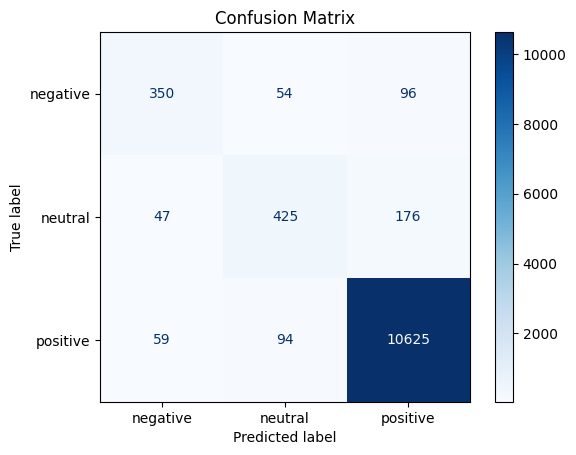

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

labels = ["negative", "neutral", "positive"]

cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix")
plt.show()


In [91]:
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "negative"
    elif r == 3:
        return "neutral"
    elif r in [4, 5]:
        return "positive"
    else:
        return None

df["rating_sentiment"] = df[RATING_COL].apply(rating_to_sentiment)
df["rating_sentiment"].value_counts()


rating_sentiment
positive    54718
neutral      2566
negative     2312
Name: count, dtype: int64

In [92]:
from sklearn.metrics import confusion_matrix

df["predicted_sentiment"] = model.predict(df["text_all"])

compare_df = df.dropna(subset=["rating_sentiment"])

print("Confusion Matrix: Rating Sentiment vs Predicted Sentiment")
print(confusion_matrix(
    compare_df["rating_sentiment"],
    compare_df["predicted_sentiment"],
    labels=["negative","neutral","positive"]
))


Confusion Matrix: Rating Sentiment vs Predicted Sentiment
[[ 1134   502   676]
 [  422   439  1705]
 [  919  2284 51515]]


In [93]:
df["predicted_sentiment"].shape

(59629,)

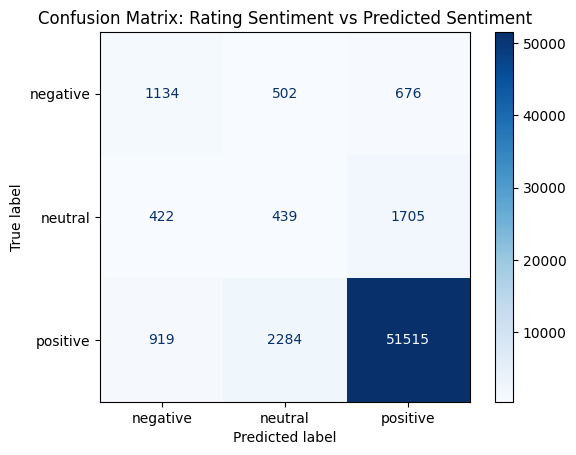

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ["negative", "neutral", "positive"]

cm = confusion_matrix(
    compare_df["rating_sentiment"],
    compare_df["predicted_sentiment"],
    labels=labels
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")

plt.title("Confusion Matrix: Rating Sentiment vs Predicted Sentiment")
plt.show()


In [95]:
accuracy = (compare_df["rating_sentiment"] == compare_df["predicted_sentiment"]).mean()
print("Agreement between Rating Sentiment and Predicted Sentiment:", round(accuracy*100, 2), "%")


Agreement between Rating Sentiment and Predicted Sentiment: 89.08 %


In [96]:
from sklearn.metrics import f1_score, cohen_kappa_score

print("Macro F1:",
      f1_score(compare_df["rating_sentiment"],
               compare_df["predicted_sentiment"],
               average="macro"))

print("Kappa:",
      cohen_kappa_score(compare_df["rating_sentiment"],
                        compare_df["predicted_sentiment"]))


Macro F1: 0.5246621056043314
Kappa: 0.34106709216947706


In [97]:
from sklearn.metrics import classification_report
print(classification_report(compare_df["rating_sentiment"],
                            compare_df["predicted_sentiment"]))


              precision    recall  f1-score   support

    negative       0.46      0.49      0.47      2312
     neutral       0.14      0.17      0.15      2566
    positive       0.96      0.94      0.95     54718

    accuracy                           0.89     59596
   macro avg       0.52      0.53      0.52     59596
weighted avg       0.90      0.89      0.90     59596



In [98]:
df["final_sentiment"] = df["predicted_sentiment"]
df["final_sentiment"].value_counts()

final_sentiment
positive    53924
neutral      3229
negative     2476
Name: count, dtype: int64

In [ ]:
df.columns

Index(['review_id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'id', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'primaryCategories', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'text_all', 'word_count', 'word_bin', 'weak_label',
       'rating_sentiment', 'predicted_sentiment', 'final_sentiment'],
      dtype='str')

In [ ]:
df.shape

(59629, 35)

In [ ]:
# export_cols = [
#     "reviews.id",
#     "asins",
#     "name",
#     "reviews.text",
#     "reviews.rating",
#     "final_sentiment"
# ]

# df_export = df[export_cols].copy()

# df_export.to_csv("..//datasets//processed//sentiment_enriched_reviews.csv", index=False)
